In [1]:
# Importing pandas for data analysis, EDA, and data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv('emails.csv', encoding='latin-1')

# Dataset Uploading

In [3]:
# Checking the first 10 values
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
# Checking the last 10 values
df.tail(10)

,text,spam
5718,"Subject: altos na gas model kim , i know you ...",0
5719,Subject: power market research i came across ...,0
5720,Subject: re : visit to houston fyi - - - - -...,0
5721,Subject: ees risk management presentations for...,0
5722,Subject: re : vacation vince : i just found ...,0
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [5]:
# Checking the rows and columns(m*n)
df.shape

(5728, 2)

In [6]:
# Checking the column names
df.columns

Index(['text', 'spam'], dtype='object')

In [7]:
# Checking for the nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


As we see there are no null values

In [8]:
# Re-Checking for nulls
df.isnull().sum()

text    0
spam    0
dtype: int64

In [9]:
# Row-wise all values are displayed
df.values

array([["Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : 

In [10]:
# Libraries needed for NLP
import nltk
import re

# Stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Stemmers
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

# Lemmatizer
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\riju201299\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\riju201299\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\riju201299\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:


# Store it in a variable
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [12]:
#df['label'] = df['label'].map( {'spam': 1, 'ham': 0})

In [13]:
# Cleanup

# replace email address with 'emailaddress'
df['text'] = df['text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress')

# replace urls with 'webaddress'
df['text'] = df['text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')

# replace money symbol with 'money-symbol'
df['text'] = df['text'].str.replace(r'£|\$', 'money-symbol')

# replace 10 digit phone number with 'phone-number'
df['text'] = df['text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phone-number')

# replace normal number with 'number'
df['text'] = df['text'].str.replace(r'\d+(\.\d+)?', 'number')

# remove punctuation
df['text'] = df['text'].str.replace(r'[^\w\d\s]', ' ')

# remove whitespace between terms with single space
df['text'] = df['text'].str.replace(r'\s+', ' ')

# remove leading and trailing whitespace
df['text'] = df['text'].str.replace(r'^\s+|\s*?$', ' ')

# change words to lower case
df['text'] = df['text'].str.lower()

In [14]:
# Applying English Stopwords
df['text'] = df['text'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [15]:
# Applying snowball stemmer
snowball = nltk.SnowballStemmer("english")
df['text'] = df['text'].apply(lambda x: ' '.join(snowball.stem(term) for term in x.split()))

Using snowball I got better results compared to Porter Stemmer and Wordnet Lemmatizer

In [16]:
# Applying Porter Stemmer
#df['SMS'] = df['SMS'].apply(lambda x: ' '.join(ps.stem(term) for term in x.split()))

In [17]:
# Applying Wordnet Lemmatizer
#df['SMS'] = df['SMS'].apply(lambda x: ' '.join(lemmatizer.lemmatize(term) for term in x.split()))

In [18]:
# Creating a bag-of-words model
df_final = df['text']
from nltk.tokenize import word_tokenize

bow = []
for sms in df_final:
    words = word_tokenize(sms)
    for w in words:
        bow.append(w)

In [19]:
# Implementing TF|IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_model = TfidfVectorizer()
tfidf_vec=tfidf_model.fit_transform(df_final)
tfidf_data=pd.DataFrame(tfidf_vec.toarray())

In [20]:
tfidf_data.head()

,0,1,2,3,4,5,6,7,8,9,...,25597,25598,25599,25600,25601,25602,25603,25604,25605,25606
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# Defining the train and test
df_train = tfidf_data.iloc[:4457]
df_test = tfidf_data.iloc[4457:]

target = df['spam']
df_train['spam'] = target

Y = df_train['spam']
X = df_train.drop('spam',axis=1)

In [22]:
# Checking the predictors
X.head(10)

,0,1,2,3,4,5,6,7,8,9,...,25597,25598,25599,25600,25601,25602,25603,25604,25605,25606
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# Checking the target
Y.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: spam, dtype: int64

In [24]:
# Splitting the data into train and test
from sklearn import model_selection
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=.35, random_state=42)

In [25]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,25597,25598,25599,25600,25601,25602,25603,25604,25605,25606
1894,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
Y_train.head()

1894    0
1011    1
4198    0
1909    0
3344    0
Name: spam, dtype: int64

In [27]:
X_train.shape

(2897, 25607)

# Applying RandomForestClassifier

In [28]:
from sklearn.ensemble import  RandomForestClassifier
rfm=RandomForestClassifier(n_estimators=15, oob_score=False, n_jobs=-1, 
                           random_state=101, max_features=None, min_samples_leaf=30)

In [29]:
rfm.fit(X_train, Y_train.values.ravel()) 

RandomForestClassifier(max_features=None, min_samples_leaf=30, n_estimators=15,
                       n_jobs=-1, random_state=101)

In [30]:
print("TRAIN SET", rfm.score(X_train, Y_train))
print("TEST  SET", rfm.score(X_test, Y_test))

TRAIN SET 0.9440800828443218
TEST  SET 0.9384615384615385


In [31]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfm, X_train, Y_train.values.ravel(), cv=4)
scores

array([0.93655172, 0.93646409, 0.90055249, 0.92265193])

In [32]:
print("Average: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Average: 0.92 (+/- 0.03)


In [33]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, Y_train)

y_predicted = model.predict(X_test)

model.predict_proba(X_test)

model.score(X_test,Y_test)

print("Coefficient of determination R^2 <-- on train set: {}".format(model.score(X_train, Y_train)))

print("Coefficient of determination R^2 <-- on test set: {}".format(model.score(X_test, Y_test)))

Coefficient of determination R^2 <-- on train set: 0.9948222298929927
Coefficient of determination R^2 <-- on test set: 0.9743589743589743


# DecisionTreeClassifier

In [34]:
from sklearn import tree
from sklearn.metrics import accuracy_score
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [35]:
y_pred=clf.predict(X_test)

In [36]:
dt_acc = accuracy_score(Y_test,y_pred)

In [37]:
dt_acc

0.9519230769230769

# Comparison of Algorithms

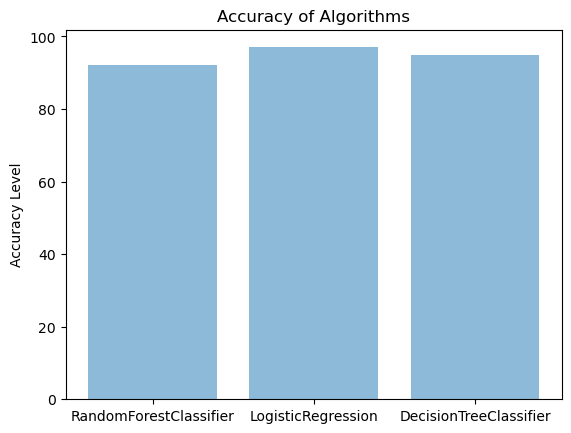

In [38]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('RandomForestClassifier','LogisticRegression','DecisionTreeClassifier')
y_pos = np.arange(len(objects))
performance = [92,97,95]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy Level')
plt.title('Accuracy of Algorithms')
 
plt.show()

In [39]:
#Exporting the model using joblib library
import joblib
joblib.dump(model,"SMS_Detection_Model.pkl")

['SMS_Detection_Model.pkl']

In [40]:
#Exporting TF|IDF using joblib library
joblib.dump(tfidf_model,"TF_IDF.pkl")

['TF_IDF.pkl']

In [41]:
classifier = joblib.load('SMS_Detection_Model.pkl')
cv = joblib.load('TF_IDF.pkl')

# Testing the models

In [42]:
'Subject: from the enron india newsdesk - jan 18 th newsclips  vince ,  fyi .  - - - - - - - - - - - - - - - - - - - - - - forwarded by sandeep kohli / enron _ development on  01 / 19 / 2001 ']data = [
vectorized = cv.transform(data).toarray()
my_prediction = classifier.predict(vectorized)
if my_prediction[0] == 1:
    print("Spam Message")
else:
    print("Not a spam message")

Not a spam message


In [43]:
data = ['Subject: great nnews  hello , welcome to medzonline sh groundsel op  we are pleased to introduce ourselves as one of the ieading online phar felicitation maceuticai shops .  ']
vectorized = cv.transform(data).toarray()
my_prediction = classifier.predict(vectorized)
if my_prediction[0] == 1:
    print("Spam Message")
else:
    print("Not a spam message")

Spam Message
